B1. Given the data, predict whether a given customer willrent a car in November. Note: this problem deserve
more time than you have available to solve it exhaustively. Hence do not approach this as a Kaggle competition with extensive feature engineering and trying many algorithms - instead show yourfirst stab at the problem:choose some plausible features and a reasonable algorithm (please explain why you made those choices) and do all the modeling based on it.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('rentals.csv')

In [4]:
dataset.drop(['start_time',
              'end_time',
              'start_time.1',
              'end_time.1',
              'total_hours_by_day',
              'start_hour',
              'start_week'
              ],axis=1,inplace=True)

In [5]:
dataset=dataset.fillna(0)
dataset.head()

,start_date,end_date,total_time,total_hours,gender,user_id,start_weekday,review
0,2016-12-21,2017-01-08,14:00:00,432,F,9333,Wednesday,0.0
1,2016-12-21,2017-01-06,23:00:00,360,M,15763,Wednesday,0.0
2,2016-12-21,2017-01-02,14:00:00,288,M,5081,Wednesday,0.0
3,2016-12-22,2017-01-01,14:00:00,240,M,1991,Thursday,0.0
4,2016-12-23,2017-01-01,11:00:00,216,M,9590,Friday,5.0


In [6]:
# most recent review per user_id if given

most_recent_review_per_user_id = dataset.sort_values('end_date').groupby('user_id').tail(1)
most_recent_review_per_user_id

# total number of hours group by user_id

total_number_of_hours_by_user_id = dataset.groupby('user_id').total_hours.agg({'total_hours':['sum']})

total_number_of_hours_by_user_id.columns = ["_".join(x) for x in total_number_of_hours_by_user_id.columns.ravel()]


total_number_of_hours_by_user_id.reset_index(level=0, inplace=True)


df = pd.merge(most_recent_review_per_user_id, total_number_of_hours_by_user_id, on='user_id')

df = df.rename(columns={'review':'recent_review'})


col_to_norm = ['recent_review', 'total_hours_sum']


df[col_to_norm] = df[col_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df.drop(['start_date','start_weekday','end_date','total_time','total_hours','gender'], axis=1,inplace=True)
df

/Users/zeeshanmalik/anaconda3/envs/car_rental/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,user_id,recent_review,total_hours_sum
0,8598,0.0,0.000868
1,18924,0.0,0.010417
2,19496,1.0,0.010417
3,21043,0.0,0.003906
4,22217,0.4,0.003906
5,22050,0.0,0.003906
6,8883,0.0,0.001302
7,21754,0.0,0.010417
8,21417,0.0,0.003472
9,19512,0.0,0.002170


In [92]:
df['weighted_average_score'] = np.where(df['recent_review']==0,
                            df['total_hours_sum'], 
                            (0.90 * df['recent_review'] + 0.10 * df['total_hours_sum']))
df[df['weighted_average_score']> 0.5].sort_values('weighted_average_score',ascending=False)

,user_id,recent_review,total_hours_sum,weighted_average_score
21200,2535,0.0,1.000000,1.000000
21106,3818,1.0,0.712674,0.971267
21125,798,1.0,0.530382,0.953038
14026,4211,1.0,0.458333,0.945833
11255,19583,1.0,0.409722,0.940972
10163,7516,1.0,0.390625,0.939063
13995,5442,1.0,0.298177,0.929818
11034,3048,1.0,0.277344,0.927734
18538,6444,1.0,0.274306,0.927431
20909,951,1.0,0.273003,0.927300


In [93]:
df['label']= np.where(df['weighted_average_score']>=0.5,1,0)

df.groupby('label').count()

i_class0 = np.where(df['label'] == 0)[0]
i_class1 = np.where(df['label'] == 1)[0]

n_class0 = len(i_class0)
n_class1 = len(i_class1)

i_class0_downsampled = np.random.choice(i_class0, size=n_class1, replace=False)


index_list = np.hstack((i_class1, i_class0_downsampled)).tolist()

df = df.iloc[index_list]



In [94]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


X = df.iloc[:,0:3]
y = df.iloc[:,4:5]

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.4)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

param = {
    'eta': 0.3, 
    'max_depth': 10,  
    'objective': 'multi:softprob',
    'num_class': 2} 

steps = 50

model = xgb.train(param, D_train, steps)


In [95]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))



Precision = 0.9996792815907634
Recall = 0.9996706192358367
Accuracy = 0.9996749024707412


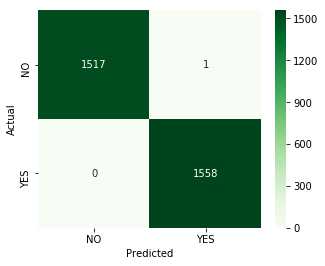

In [96]:
array = confusion_matrix(Y_test, best_preds)
df = pd.DataFrame(array, index=['NO', 'YES'], columns=['NO', 'YES'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

B2. If asked to improve your prediction above, explain how you would go about doing that (do not DO the work,
just explain your plans)

Since the above is the first very quick dirty attempt so next I would

1. Further find out relationship between review and start_weekday and start_week.

2. Analyze the Typical Gender Behavoir from the Data.

2. Putting more weight on most recent review in comparison to old reviews using exponential moving average  
   criteria.
   
3. Deriving more latent features on the basis of more than one long and short term  windows.

4. Analyze the start hour period and see its relationship with reviews and other potential features.

5. Instead of considering the most recent review further statiscally evaluate other potential criterias of      review selection.

6. Analyzing the weekends and off-weekends behaviour of customers.

7. Improve the probabilistic score by using multi-variate gaussian probability distribution and other    
   potential technique more impactful to score each customers repeating ratio.